## NetworkX

### Grafik Oluşturma:
Düğümleri ve kenarları olmayan boş bir grafik oluşturma:

In [44]:
import networkx as nx
G = nx.Graph()

----

### Nodes:
G grafiği çeşitli şekillerde büyütülebilir. NetworkX, birçok formattaki grafikleri okumak ve yazmak için çeşitli grafik oluşturucu işlevleri ve olanakları içerir. Her seferinde bir düğüm ekleyebilirsiniz:

In [45]:
G.add_node(1)

veya bir listeden herhangi bir düğümden düğüm ekleyebilirsiniz:

In [46]:
G.add_nodes_from([2, 3])

Düğümlerinizin öznitelikleri varsa aşağıdaki gibi yazabilirsiniz:

In [47]:
G.add_nodes_from([
    (4, {"color": "red"}),
    (5, {"color": "green"}),
])

Bir grafikteki düğümler diğerine dahil edilebilir:

In [48]:
H = nx.path_graph(10)
G.add_nodes_from(H)

G artık H'nin düğümlerini G'nin düğümleri olarak içerir. Buna karşılık, H grafiğini G'nin düğümü olarak kullanabilirsiniz.

In [49]:
G.add_node(H)

---

### Edge:
G, her seferinde bir kenar eklenerek de büyütülebilir:

In [50]:
G.add_edge(1, 2)
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

bir kenar listesi ekleyerek,

In [51]:
G.add_edges_from([(1, 2), (1, 3)])

veya bir demet edge ekleyerek.

In [52]:
G.add_edges_from(H.edges)

Mevcut düğümleri veya kenarları eklerken herhangi bir sorun yoktur. Örneğin, tüm düğümleri ve kenarları kaldırdıktan sonra,

In [53]:
G.clear()

yeni düğümler/kenarlar ekleriz ve NetworkX zaten mevcut olanları sessizce yok sayar.

In [54]:
G.add_edges_from([(1, 2), (1, 3)])
G.add_node(1)
G.add_edge(1, 2)
G.add_node("spam")        # adds node "spam"
G.add_nodes_from("spam")  # adds 4 nodes: 's', 'p', 'a', 'm'
G.add_edge(3, 'm')

Bu aşamada G grafiği, aşağıdaki şekilde görülebileceği gibi 8 düğüm ve 3 kenardan oluşur:

In [55]:
G.number_of_nodes()

8

In [56]:
G.number_of_edges()

3

In [57]:
DG = nx.DiGraph()
DG.add_edge(2, 1)   # adds the nodes in order 2, 1
DG.add_edge(1, 3)
DG.add_edge(2, 4)
DG.add_edge(1, 2)
assert list(DG.successors(2)) == [1, 4]
assert list(DG.edges) == [(2, 1), (2, 4), (1, 3), (1, 2)]

---

### Bir Grafiğin Öğelerini İnceleme

In [58]:
list(G.nodes)

[1, 2, 3, 'spam', 's', 'p', 'a', 'm']

In [59]:
list(G.edges)

[(1, 2), (1, 3), (3, 'm')]

In [60]:
list(G.adj[1])  # or list(G.neighbors(1))

[2, 3]

In [61]:
G.degree[1]  # the number of edges incident to 1

2

In [62]:
G.edges([2, 'm'])

EdgeDataView([(2, 1), ('m', 3)])

In [63]:
G.degree([2, 3])

DegreeView({2: 1, 3: 2})

---

### Bir Grafikten Öğeleri Kaldırma:  
Eklemeye benzer şekilde grafikten düğümler ve kenarlar kaldırılabilir.

In [64]:
G.remove_node(2)
G.remove_nodes_from("spam")
list(G.nodes)
G.remove_edge(1, 3)

---

### Grafik Oluşturucuları Kullanma:  
Grafik nesnelerinin artımlı olarak oluşturulması gerekmez - grafik yapısını belirten veriler doğrudan çeşitli grafik sınıflarının oluşturucularına iletilebilir. Grafik sınıflarından birini örnekleyerek bir grafik yapısı oluştururken, verileri çeşitli formatlarda belirtebilirsiniz.

In [65]:
G.add_edge(1, 2)
H = nx.DiGraph(G)  # create a DiGraph using the connections from G
list(H.edges())

[(1, 2), (2, 1)]

In [66]:
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)  # create a graph from an edge list
list(H.edges())

[(0, 1), (1, 2), (2, 3)]

In [67]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)  # create a Graph dict mapping nodes to nbrs
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

---

### Kenarlara ve Komşulara Erişme:

Graph.edges ve Graph.adj görünümlerine ek olarak, alt simge gösterimi kullanılarak kenarlara ve komşulara erişim mümkündür.

In [68]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1]  # same as G.adj[1]

AtlasView({2: {'color': 'yellow'}})

In [69]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G[1][2]

{'color': 'yellow'}

In [70]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
G.edges[1, 2]

{'color': 'yellow'}

Kenar zaten varsa, alt simge gösterimini kullanarak bir kenarın niteliklerini alabilir/ayarlayabilirsiniz.

In [71]:
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{'color': 'red'}

G.adjacency() veya G.adj.items() kullanılarak tüm (düğüm, komşuluk) çiftlerinin hızlı bir şekilde incelenmesi sağlanır. Yönsüz grafikler için bitişik yinelemenin her bir kenarı iki kez gördüğünü unutmayın.

In [72]:
FG = nx.Graph()
FG.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in FG.adj.items():
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


edges özelliği ile tüm kenarlara rahat erişim sağlanır.

In [73]:
for (u, v, wt) in FG.edges.data('weight'):
    if wt < 0.5:
        print(f"({u}, {v}, {wt:.3})")

(1, 2, 0.125)
(3, 4, 0.375)


---

### Grafiklere, Düğümlere ve Kenarlara Nitelikler Ekleme:

Ağırlıklar, etiketler, renkler veya istediğiniz herhangi bir Python nesnesi gibi nitelikler grafiklere, düğümlere veya kenarlara eklenebilir.  

Her grafik, düğüm ve uç, ilişkili bir öznitelik sözlüğünde anahtar/değer öznitelik çiftlerini tutabilir (anahtarlar hashable olmalıdır). Varsayılan olarak bunlar boştur, ancak nitelikler add_edge, add_node kullanılarak veya bir G grafiği için G.graph, G.nodes ve G.edges adlı öznitelik sözlüklerinin doğrudan manipülasyonu kullanılarak eklenebilir veya değiştirilebilir.

##### Grafik Özellikleri:  
Yeni bir grafik oluştururken grafik niteliklerini atayın

In [74]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Veya nitelikleri daha sonra değiştirebilirsiniz.

In [75]:
G.graph['day'] = "Monday"
G.graph

{'day': 'Monday'}

##### Düğüm Özellikleri:  
add_node(), add_nodes_from() veya G.nodes kullanarak düğüm özniteliklerini ekleyin.

In [76]:
G.add_node(1, time='5pm')
G.add_nodes_from([3], time='2pm')
G.nodes[1]

{'time': '5pm'}

In [77]:
G.nodes[1]['room'] = 714
G.nodes.data()

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

G.nodes'a bir düğüm eklemenin onu grafiğe eklemediğini unutmayın, yeni düğümler eklemek için G.add_node()'u kullanın. Benzer şekilde kenarlar için.  

##### Kenar Özellikleri:  
add_edge(), add_edges_from() veya alt simge gösterimini kullanarak kenar özniteliklerini ekleyin/değiştirin.

In [78]:
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2

Özel öznitelik ağırlığı, ağırlıklı kenarlar gerektiren algoritmalar tarafından kullanıldığı için sayısal olmalıdır.

---

### Yönlendirilmiş Grafikler:  
DiGraph sınıfı, yönlendirilmiş kenarlara özgü ek yöntemler ve özellikler sağlar, örneğin, DiGraph.out_edges, DiGraph.in_degree, DiGraph.predecessors, DiGraph.successors vb. derece, zaman zaman tutarsız gibi görünse de in_degree ve out_degree'nin toplamını bildirir.

In [79]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75)])
DG.out_degree(1, weight='weight')

0.5

In [80]:
DG.degree(1, weight='weight')

1.25

In [81]:
list(DG.successors(1))

[2]

In [82]:
list(DG.neighbors(1))

[2]

Bazı algoritmalar yalnızca yönlendirilmiş grafikler için çalışır ve diğerleri yönlendirilmiş grafikler için iyi tanımlanmamıştır. Gerçekten de yönlendirilmiş ve yönlendirilmemiş grafikleri bir araya getirme eğilimi tehlikelidir. Yönlendirilmiş bir grafiği bazı ölçümler için yönsüz olarak ele almak istiyorsanız, muhtemelen Graph.to_undirected() kullanarak veya ile dönüştürmelisiniz.

In [83]:
H = nx.Graph(G)  # create an undirected graph H from a directed graph G

## Multigraphs:  

NetworkX, herhangi bir düğüm çifti arasında birden fazla kenara izin veren grafikler için sınıflar sağlar. MultiGraph ve MultiDiGraph sınıfları, muhtemelen farklı kenar verileriyle aynı kenarı iki kez eklemenize izin verir. Bu, bazı uygulamalar için güçlü olabilir, ancak birçok algoritma bu tür grafiklerde iyi tanımlanmamıştır. Sonuçların iyi tanımlandığı yerlerde, örneğin, MultiGraph.degree() işlevini sağlarız. Aksi takdirde, ölçümü iyi tanımlanmış hale getirecek şekilde standart bir grafiğe dönüştürmelisiniz.

In [84]:
MG = nx.MultiGraph()
MG.add_weighted_edges_from([(1, 2, 0.5), (1, 2, 0.75), (2, 3, 0.5)])
dict(MG.degree(weight='weight'))

{1: 1.25, 2: 1.75, 3: 0.5}

In [85]:
GG = nx.Graph()
for n, nbrs in MG.adjacency():
   for nbr, edict in nbrs.items():
       minvalue = min([d['weight'] for d in edict.values()])
       GG.add_edge(n, nbr, weight = minvalue)

nx.shortest_path(GG, 1, 3)

[1, 2, 3]

In [88]:
er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [89]:
nx.write_gml(red, "path.to.file")
mygraph = nx.read_gml("path.to.file")

---

## Grafikleri Analiz Etme:  
G'nin yapısı, aşağıdakiler gibi çeşitli grafik-teorik fonksiyonlar kullanılarak analiz edilebilir:

In [90]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))

[{1, 2, 3}, {'spam'}]

In [91]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())

[0, 1, 1, 2]

In [92]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3)])
G.add_node("spam")       # adds node "spam"
list(nx.connected_components(G))
sorted(d for n, d in G.degree())
nx.clustering(G)

{1: 0, 2: 0, 3: 0, 'spam': 0}

Büyük çıktıya sahip bazı işlevler, (düğüm, değer) 2-demetler üzerinde yinelenir. Bunlar, dilerseniz kolayca bir dict yapısında saklanır.

In [93]:
sp = dict(nx.all_pairs_shortest_path(G))
sp[3]

{3: [3], 1: [3, 1], 2: [3, 1, 2]}

---

## Grafik Çizme:  
NetworkX öncelikle bir grafik çizim paketi değildir, ancak Matplotlib ile temel çizimin yanı sıra açık kaynaklı Graphviz yazılım paketini kullanmak için bir arayüz dahildir. Bunlar networkx.drawing modülünün parçasıdır ve mümkünse içe aktarılacaktır.  

Önce Matplotlib'in çizim arayüzünü içe aktarın (pylab da çalışır)

In [94]:
import matplotlib.pyplot as plt

nx_plab içe aktarımının başarılı olup olmadığını test etmek için aşağıdakilerden birini kullanarak G çizin

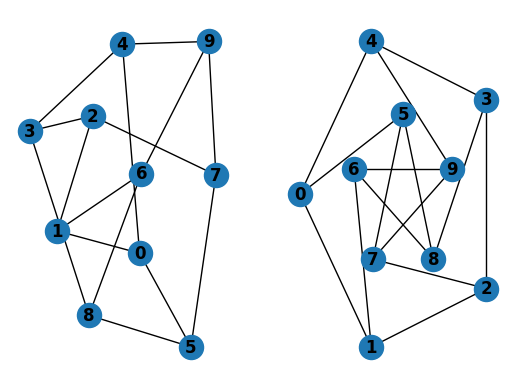

In [95]:
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

etkileşimli bir ekrana çizim yaparken. Etkileşimli modda matplotlib kullanmıyorsanız, bir Matplotlib komutu vermeniz gerekebileceğini unutmayın.

In [96]:
plt.show()

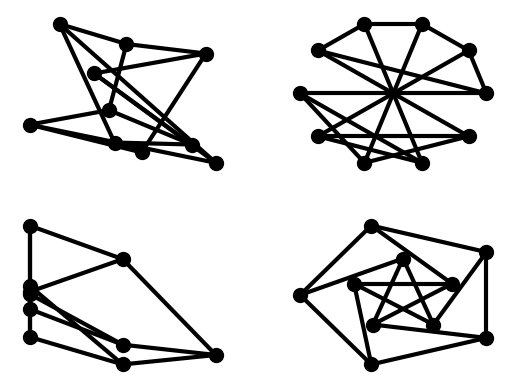

In [97]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

Draw_networkx() aracılığıyla ek seçenekler ve düzen modülü aracılığıyla düzenler bulabilirsiniz. Draw_shell() ile birden çok kabuk kullanabilirsiniz.

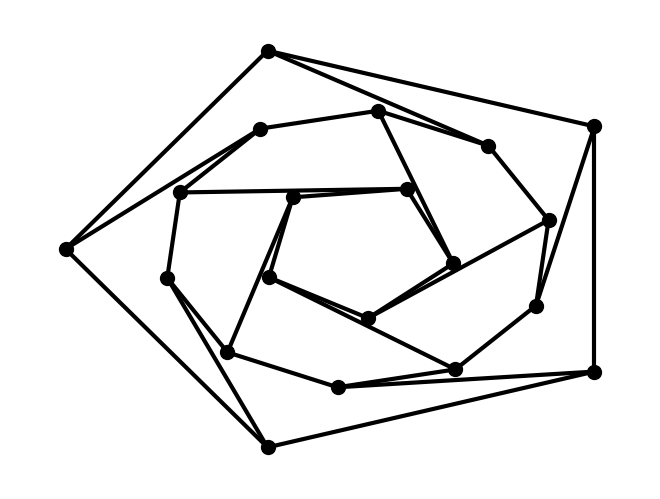

In [98]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

Çizimleri bir dosyaya kaydetmek için örneğin şunu kullanın:

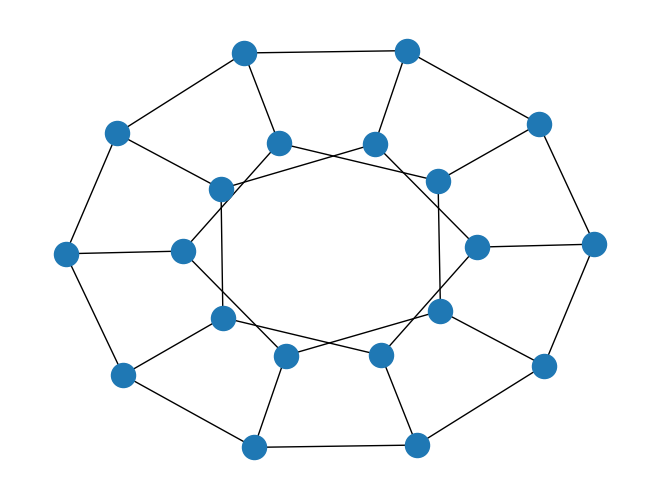

In [99]:
nx.draw(G)
plt.savefig("path.png")

Bu işlev, yerel dizindeki path.png dosyasına yazar. Sisteminizde Graphviz ve PyGraphviz veya pydot varsa, düğüm konumlarını almak için networkx.drawing.nx_agraph.graphviz_layout veya networkx.drawing.nx_pydot.graphviz_layout'u da kullanabilir veya daha sonraki işlemler için grafiği nokta biçiminde yazabilirsiniz.

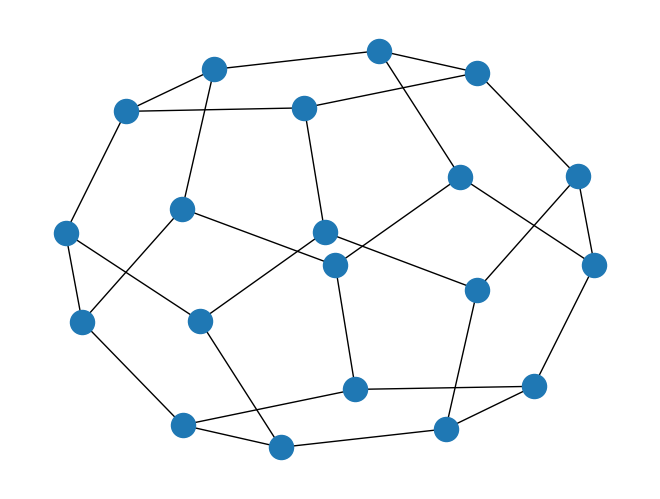

In [100]:
import networkx as nx
from networkx.drawing.nx_pydot import write_dot
pos = nx.nx_agraph.graphviz_layout(G)
nx.draw(G, pos=pos)
write_dot(G, 'file.dot')